4.1. MIÊU TẢ DỮ LIỆU

Ngữ cảnh:
Bộ dữ liệu được cung cấp từ một công ty viễn thông có hồ sơ thông tin khách hàng và tỷ lệ rời bỏ của họ.

Mục tiêu: dự đoán những khách hàng có thể ngừng sử dụng dịch vụ viễn thông để đề ra các giải pháp nhằm giảm thiểu tỷ lệ khách hàng rời bỏ dịch vụ viễn thông.

Dữ liệu thô gồm 7043 cột, 21 hàng

Nội dung:

Mỗi hàng đại diện cho một khách hàng, mỗi cột chứa các thuộc tính của khách hàng được mô tả trên cột siêu dữ liệu.

Bộ dữ liệu bao gồm thông tin về:

Khách hàng đã rời đi trong tháng trước – cột được gọi là Churn

Các dịch vụ mà mỗi khách hàng đã đăng ký - điện thoại, nhiều đường dây, internet, bảo mật trực tuyến, sao lưu trực tuyến, bảo vệ thiết bị, hỗ trợ kỹ thuật và truyền hình trực tuyến và phim

Thông tin tài khoản khách hàng – họ đã là khách hàng bao lâu, hợp đồng, phương thức thanh toán, thanh toán không cần giấy tờ, phí hàng tháng và tổng phí

Thông tin nhân khẩu học về khách hàng – giới tính, độ tuổi và nếu họ có đối tác và người phụ thuộc

Cụ thể:

CustomerID: ID khách hàng

Gender: Khách hàng là nam hay nữ

SeniorCitizen : Khách hàng có phải là người cao tuổi hay không (1, 0)

Partner: Khách hàng có đối tác hay không (Có, Không)

Dependents: Khách hàng có người phụ thuộc hay không (Có, Không)

tenure: Số tháng khách hàng đã gắn bó với công ty

PhoneService : Khách hàng có dịch vụ điện thoại hay không (Yes, No)

MultipleLines : Khách hàng có nhiều line hay không (Có, Không, Không có dịch vụ điện thoại)

InternetService : Nhà cung cấp dịch vụ internet của khách hàng (DSL, Fiber Optic, No)

OnlineSecurity : Khách hàng có bảo mật trực tuyến hay không (Có, Không, Không có dịch vụ internet)

OnlineBackup : Khách hàng có sao lưu trực tuyến hay không (Có, Không, Không có dịch vụ internet)

DeviceProtection : Khách hàng có bảo vệ thiết bị hay không (Có, Không, Không có dịch vụ internet)

TechSupport: Khách hàng có được hỗ trợ kỹ thuật hay không (Có, Không, Không có dịch vụ internet)

StreamingTV : Khách hàng có truyền hình trực tuyến hay không (Có, Không, Không có dịch vụ internet)

StreamingMovies : Khách hàng có streaming phim hay không (Có, Không, Không có dịch vụ internet)

Contract: Thời hạn hợp đồng của khách hàng (Hàng tháng, Một năm, Hai năm)

PaperlessBilling : Khách hàng có thanh toán không cần giấy tờ hay không (Có, Không)

PayperlessBilling : Phương thức thanh toán của khách hàng (Séc điện tử, Séc gửi qua thư, Chuyển khoản ngân hàng (tự động), Thẻ tín dụng (tự động))

MonthlyCharges : Số tiền khách hàng phải trả hàng tháng

TotalCharges : Tổng số tiền phải trả cho khách hàng

Churn: Khách hàng có rời bỏ hay không 

In [ ]:
#import các thư viện liên quan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
%matplotlib inline
import itertools
import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from datetime import datetime
import lightgbm as lgbm
import warnings
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as mtick
%matplotlib inline
df = pd.read_csv("C:/Users/PC/QTDL/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#thống kê dữ liệu
print("\n thống kê về dữ liệu: ")
display(df.describe())


 thống kê về dữ liệu: 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


4.2.TIỀN XỬ LÝ DỮ LIỆU


In [9]:
#Chuyển đổi dữ liệu
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.Churn.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Xóa dữ liệu thiếu
df.dropna(inplace = True)

# Xóa CustomerID
df.drop('customerID', axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [12]:
# làm sạch cột Total Charges 
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [ ]:
#tách churn ra làm 2 phần
churn = df[(df['Churn'] != 0)]
no_churn = df[(df['Churn'] == 0)]

In [15]:
df_cat = df.select_dtypes(include=[object])
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [16]:
# Giá trị duy nhất
for i in df_cat.columns:
    print(i, df[i].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [17]:
from sklearn.preprocessing import OneHotEncoder

# Khởi tạo một đối tượng OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform = 'pandas')

# Fit và biến đổi dữ liệu
ohetransform = ohe.fit_transform(df[df_cat.columns])

ohetransform.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [18]:
df = pd.concat([df, ohetransform], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


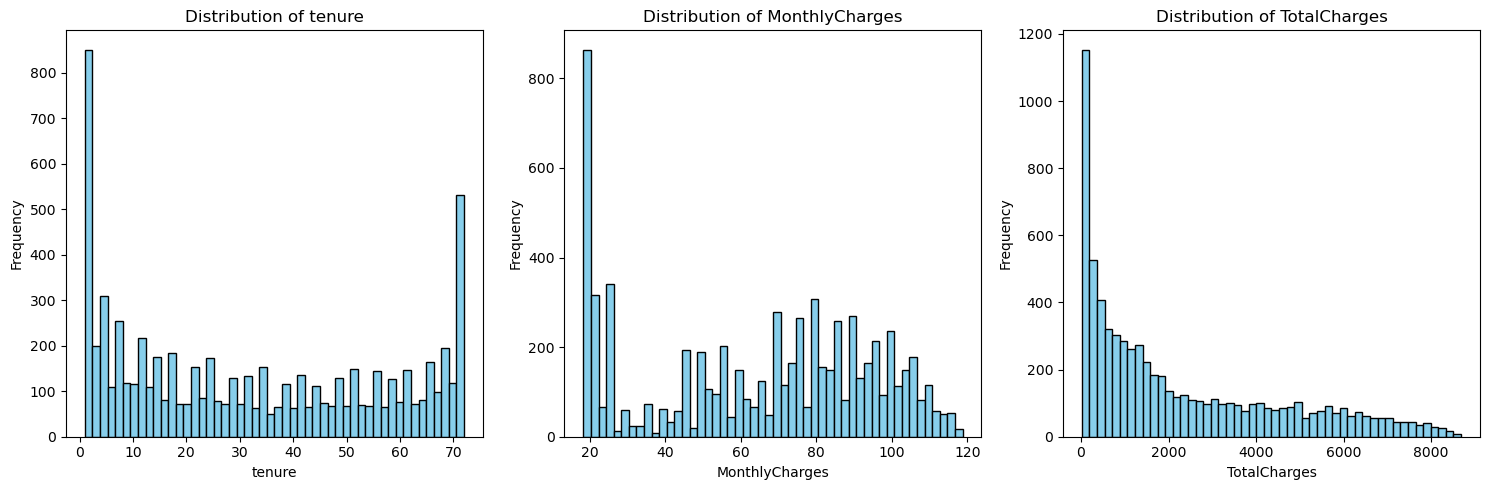

In [21]:
# Tạo biểu đồ histogram
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=50, color='skyblue', edgecolor='black')

    axes[i].set_title(f'Distribution of {column}')

    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

Text(0, 0.5, 'Churn')

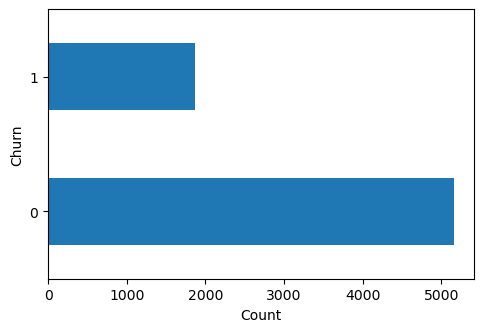

In [22]:
# Tạo biểu đồ cột ngang để đếm slg mẫu thuộc mỗi nhóm
df['Churn'].value_counts().plot(kind='barh', figsize=(5.5, 3.5))
plt.xlabel('Count')
plt.ylabel('Churn')

C:\Users\PC\AppData\Local\Temp\ipykernel_12992\371616936.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i, figsize=(5, 3))


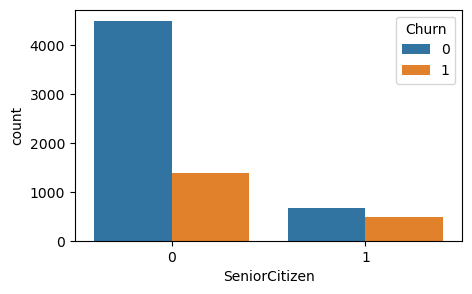

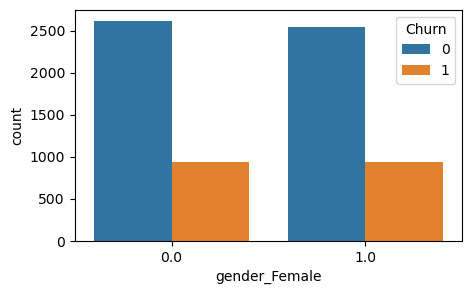

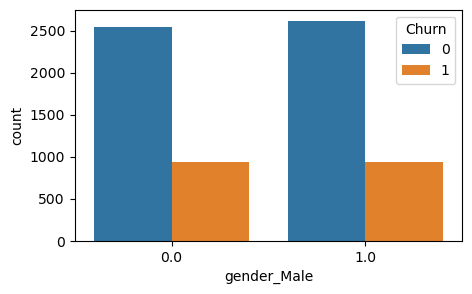

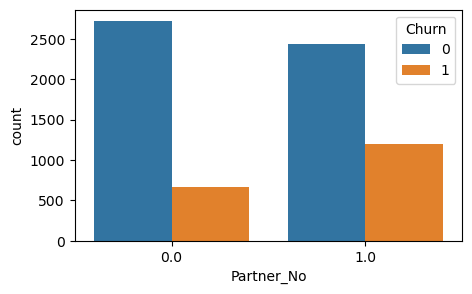

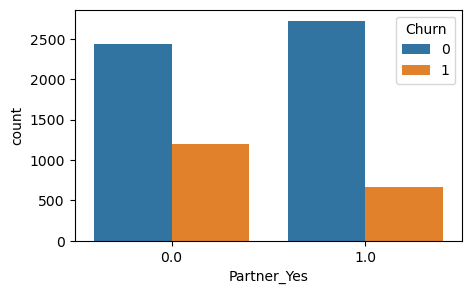

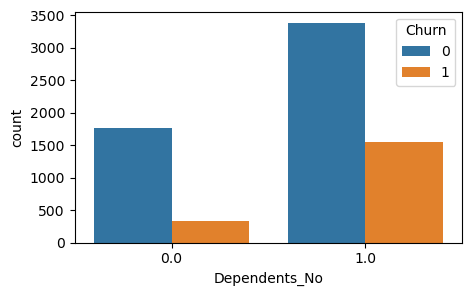

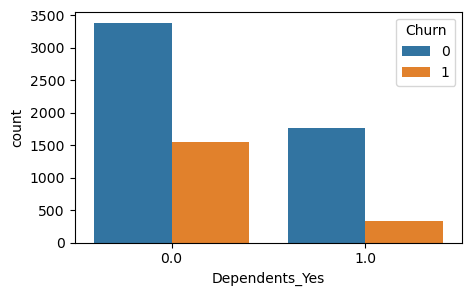

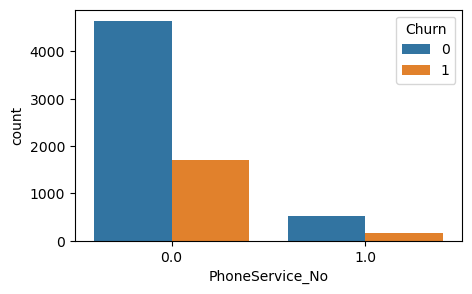

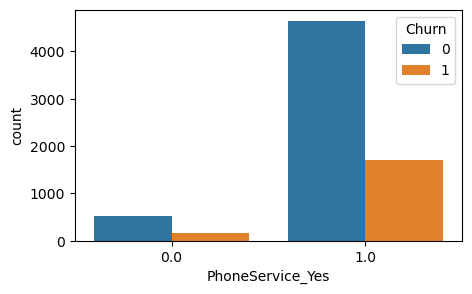

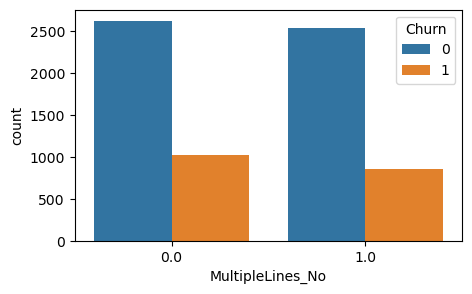

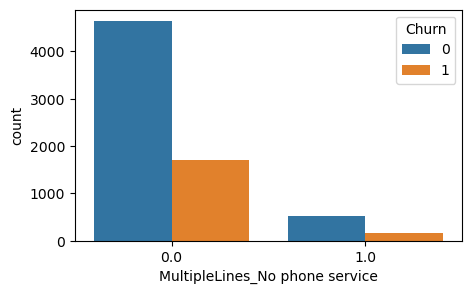

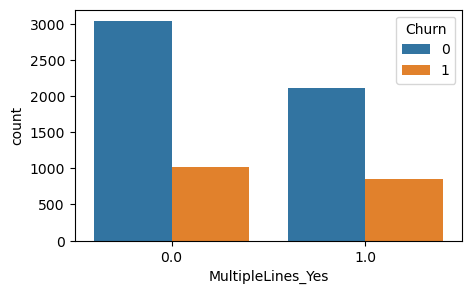

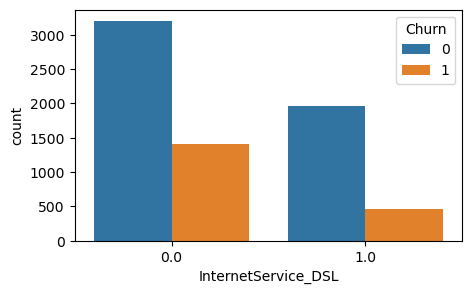

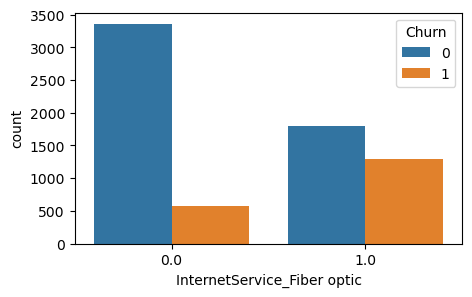

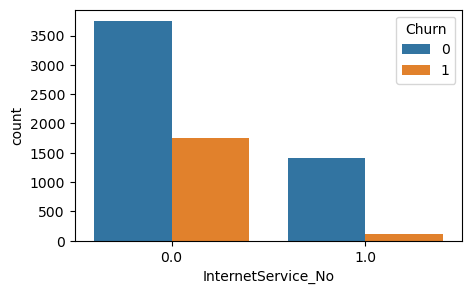

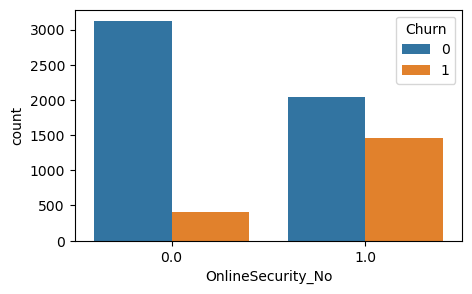

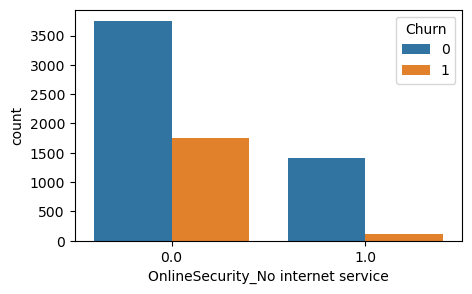

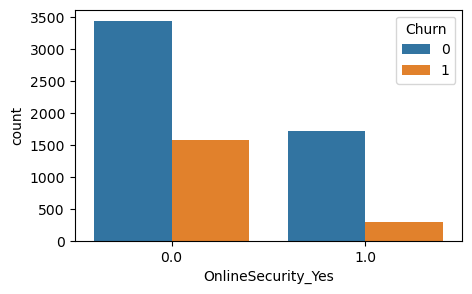

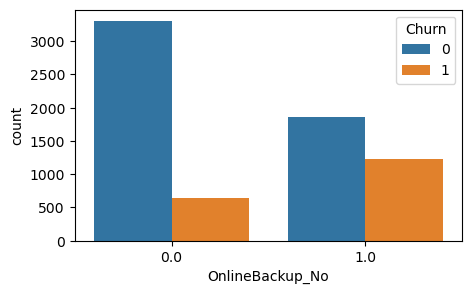

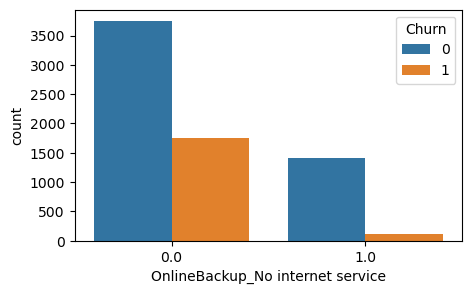

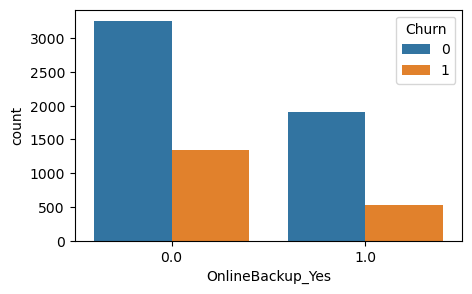

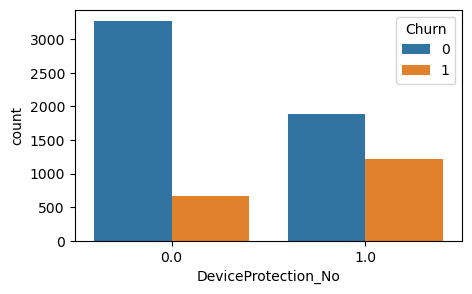

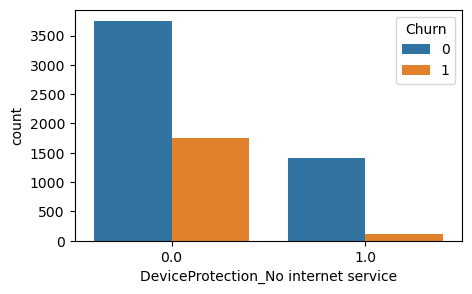

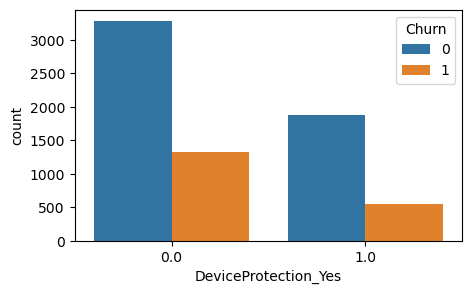

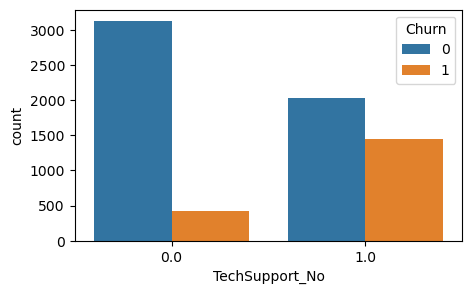

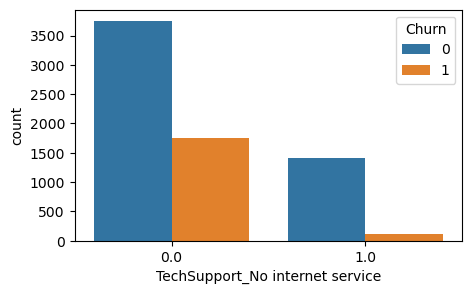

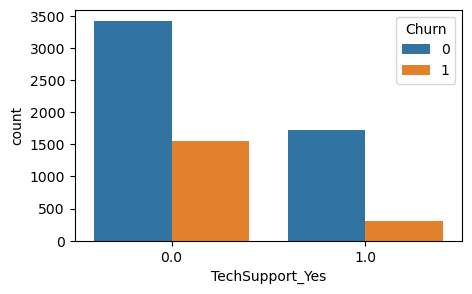

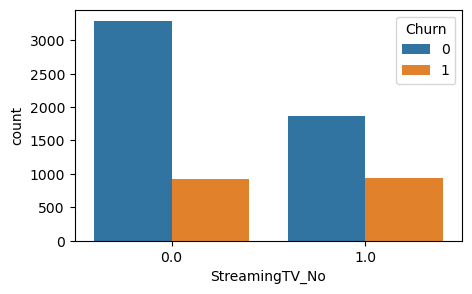

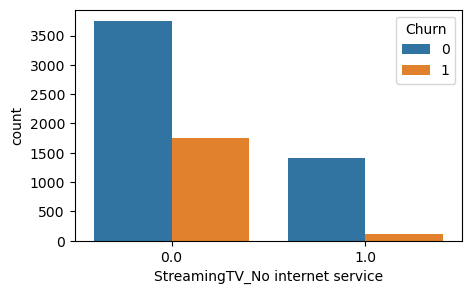

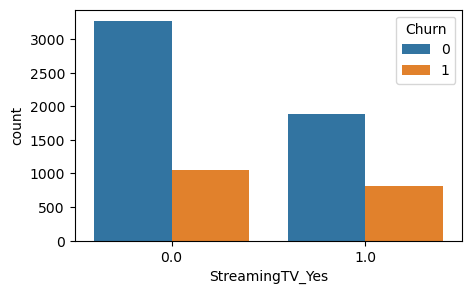

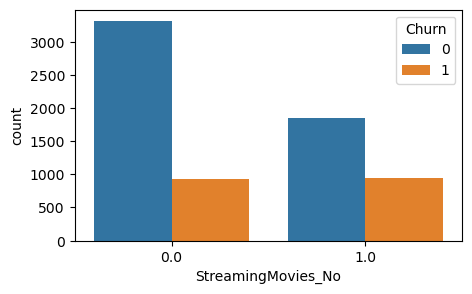

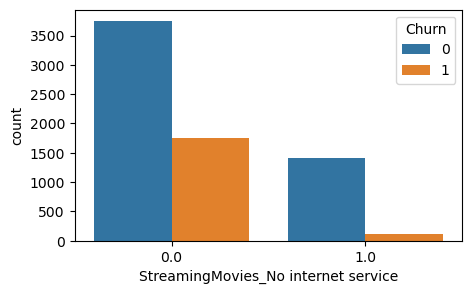

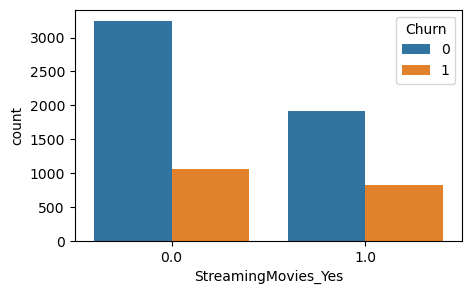

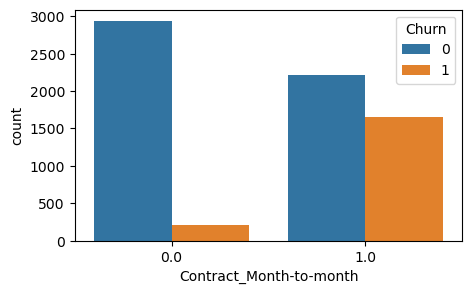

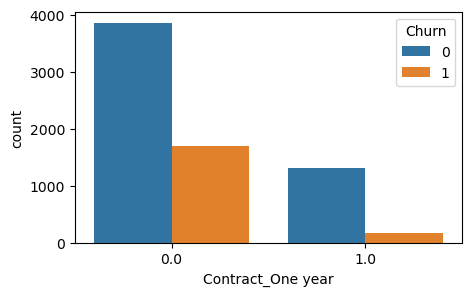

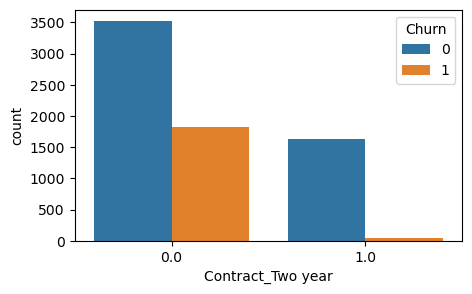

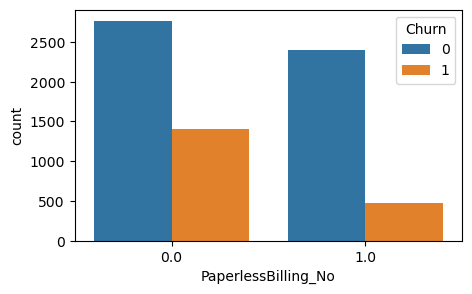

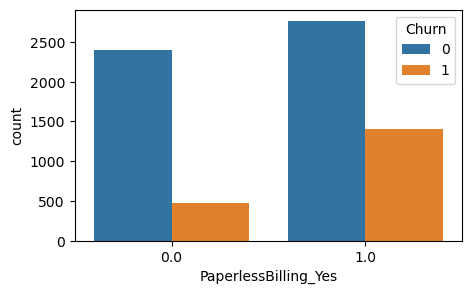

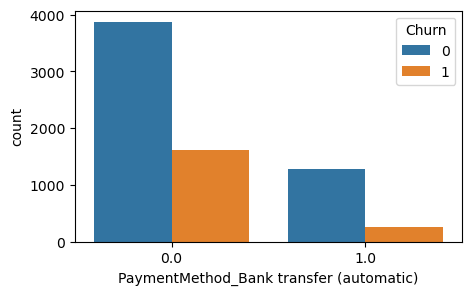

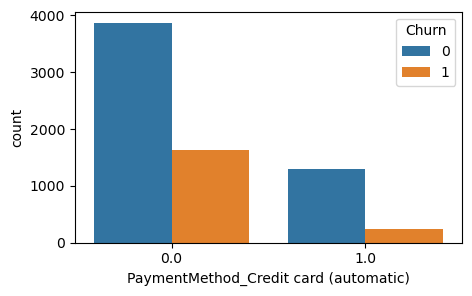

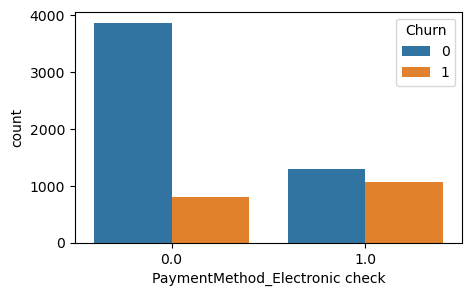

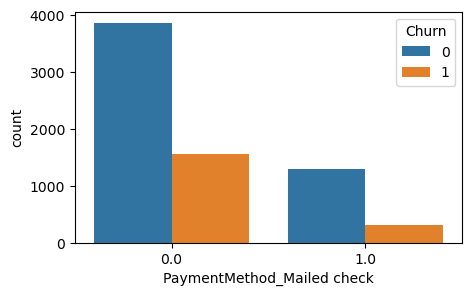

In [23]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=df, x=predictor, hue='Churn')

In [24]:
df[['MonthlyCharges', 'Churn']]

,MonthlyCharges,Churn
0,29.85,0
1,56.95,0
2,53.85,1
3,42.30,0
4,70.70,1
...,...,...
7038,84.80,0
7039,103.20,0
7040,29.60,0
7041,74.40,1


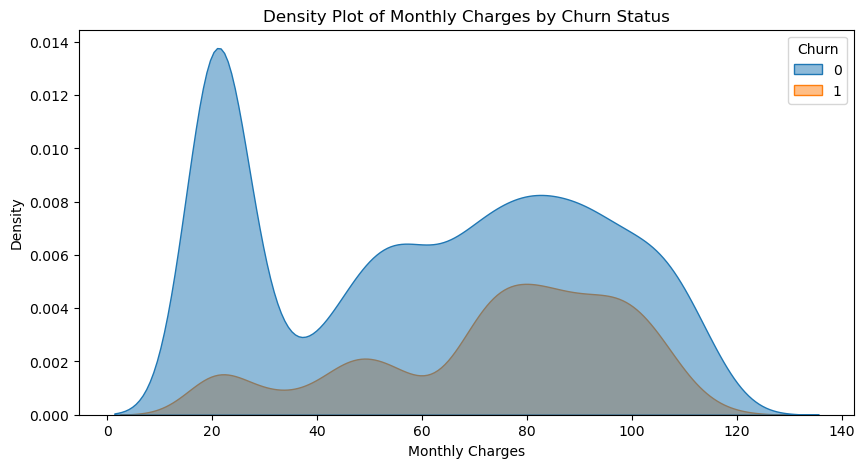

In [25]:
#Chi phí hàng tháng dựa vào churn
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5)
plt.title('Density Plot of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

<Axes: >

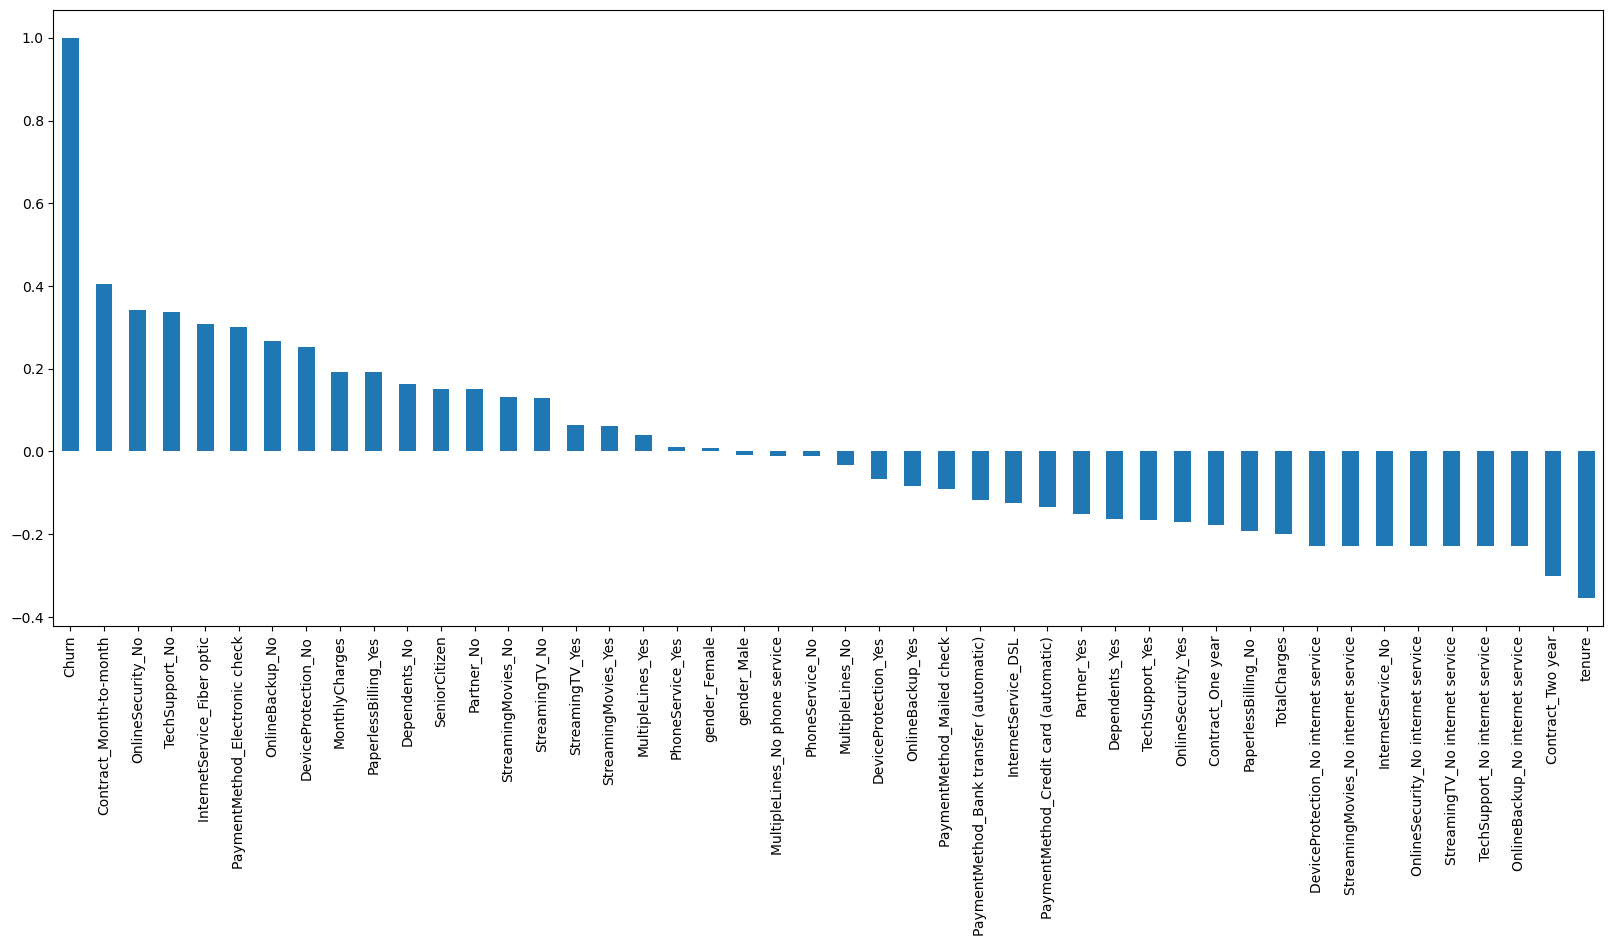

In [26]:
#Sự tương quan giữa churn và các biến khác
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [42]:
#biểu đồ cột đếm churn
trace = go.Bar(
        x = (df['Churn'].value_counts().values.tolist()), 
        y = ['Churn : no', 'Churn : yes'], 
        orientation = 'h', opacity = 0.8, 
        text=df['Churn'].value_counts().values.tolist(), 
        textfont=dict(size=15),
        textposition = 'auto',
        marker=dict(
        color=['green','red'],
        line=dict(color='#000000',width=1.5)
        ))

layout = dict(title =  'Biểu đồ cột đếm khách số khách hàng churn',
                        autosize = False,
                        height  = 550,
                        width   = 850)
                    
fig = dict(df = [trace], layout=layout)
py.iplot(fig)
trace = go.Pie(labels = ['Churn : no', 'Churn : yes'], values = df['Churn'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['green','red'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Biểu đồ tròn thể hiện phần trăm churn',
                        autosize = False,
                        height  = 550,
                        width   = 850)
           
fig = dict(df = [trace], layout=layout)
py.iplot(fig)

NameError: name 'go' is not defined

In [ ]:
#biểu đô phân phối 
def bieudo_hist(var_select, bin_size) : 
    tmp1 = churn[var_select]
    tmp2 = no_churn[var_select]
    hist_data = [tmp1, tmp2]
    group_labels = ['Churn : yes', 'Churn : no']
    colors = ['red', 'green']
    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    fig['layout'].update(title = var_select, autosize = False,
                        height  = 550,
                        width   = 850)
    py.iplot(fig, filename = 'Density plot')

bieudo_hist('tenure', False)
bieudo_hist('MonthlyCharges', False)
bieudo_hist('TotalCharges', False)

palette ={0 : 'green', 1 : 'red'}
edgecolor = 'blue'
fig = plt.figure(figsize=(19,8))
alpha = 0.8
plt.subplot(131)
ax1 = sns.scatterplot(x = data['TotalCharges'], y = data['tenure'], hue = "Churn",
                    data = data, palette = palette, edgecolor=edgecolor, alpha = alpha)
plt.title('tổng thanh toán và thời gian ở lại')

plt.subplot(132)
ax2 = sns.scatterplot(x = data['TotalCharges'], y = data['MonthlyCharges'], hue = "Churn",
                    data = data, palette =palette, edgecolor=edgecolor, alpha = alpha)
plt.title('tổng thanh toán so với thanh toán hàng tháng')

plt.subplot(133)
ax2 = sns.scatterplot(x = data['MonthlyCharges'], y = data['tenure'], hue = "Churn",
                    data = data, palette =palette, edgecolor=edgecolor, alpha = alpha)
plt.title('thanh toán hàng tháng với thời gian ở lại')

fig.suptitle('biểu đồ scatter', fontsize = 20)
plt.savefig('1')
plt.show()

In [ ]:
#biểu đồ nhiệt thể hiện sự tương quang giữa 3 biến
df_quant = data.select_dtypes(exclude=[object])
df_quant.head()
corr_quant = df_quant.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_quant, annot=True, cmap = 'viridis', linewidths = .1, linecolor = 'blue', fmt=".2f")
ax.invert_yaxis()
ax.set_title("Mức độ tương quan")
plt.show()

In [ ]:
#hàm biểu đồ cột
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Churn'] != 0)]
    tmp2 = data[(data['Churn'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Churn']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='Churn : yes',opacity = 0.8, marker=dict(
        color='red',
        line=dict(color='#000000',width=1)))
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='Churn : no', opacity = 0.8, marker=dict(
        color='green',
        line=dict(color='#000000',width=1)))
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Churn', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))
    layout = dict(title =  str(var_select),  autosize = False,
                        height  = 550,
                        width   = 850,
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Churn'
                         ))
    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

barplot('gender', True)
barplot('SeniorCitizen', True)
barplot('Dependents', True)
barplot('PhoneService', True)
barplot('MultipleLines', True)
barplot('InternetService', True)
barplot('OnlineSecurity', True)
barplot('Partner', True)
barplot('OnlineBackup', True)
barplot('DeviceProtection', True)
barplot('TechSupport', True)
barplot('StreamingTV', True)
barplot('StreamingMovies', True)
barplot('Contract', True)
barplot('PaperlessBilling', True)
barplot('PaymentMethod', True)


In [ ]:
#hàm biểu đô cột
def plot_distribution(feature1,feature2, df): 
    plt.figure(figsize=(18,5))
    plt.subplot(121)
    s = sns.countplot(x = feature1, hue='Churn', data = df, 
                      palette = {0 : 'green', 1 :'red'}, alpha = 0.8, 
                      linewidth = 0.4, edgecolor='blue') 
    s.set_title(feature1)
    for p in s.patches:
        s.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+30))
    plt.subplot(122)
    s = sns.countplot(x = feature2, hue='Churn', data = df, 
                      palette = {0 : 'green', 1 :'red'}, alpha = 0.8, 
                      linewidth = 0.4, edgecolor='blue') 
    s.set_title(feature2)
    for p in s.patches:
        s.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+30))
    plt.show()

plot_distribution('SeniorCitizen', 'gender', data)
plot_distribution('Partner', 'Dependents', data)

In [35]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
df.head()


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [36]:
# Tạo biến độc lập và phụ thuộc
X = df.drop('Churn', axis=1)
y = df['Churn']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

Text(0.5, 427.9555555555555, 'Predicted label')

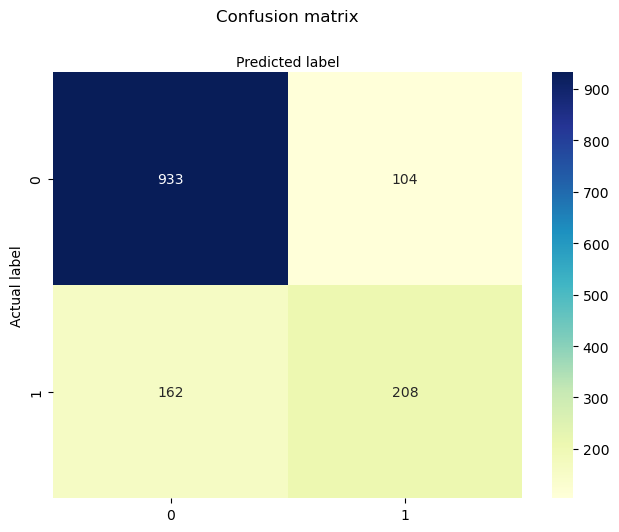

In [38]:
#Hồi quy logistic
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
# Ma trận nhầm lẫn
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Bản đồ nhiệt
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Tạo mô hình Logistic Regression
logreg = LogisticRegression(max_iter=10000)

# Huấn luyện mô hình
logreg.fit(X_train, y_train)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred = logreg.predict(X_test)

# In báo cáo phân loại
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1037
           1       0.67      0.56      0.61       370

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407



In [ ]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X,y)
y_res.value_counts()

In [ ]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res,test_size=0.2)
logreg.fit(Xr_train, yr_train)

yr_pred = logreg.predict(Xr_test)
print(classification_report(yr_test, yr_pred, labels=[0, 1]))

In [ ]:
#Cây quyết định
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(Xr_train,yr_train)
y_pred=model_dt.predict(Xr_test)
print(classification_report(yr_test, y_pred, labels=[0,1]))

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(Xr_train,yr_train)
y_pred=model_rf.predict(Xr_test)
print(classification_report(yr_test, y_pred, labels=[0,1]))

In [ ]:
#XgBoost
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(Xr_train, yr_train)
y_pred=model_rf.predict(Xr_test)
print(classification_report(yr_test, y_pred, labels=[0,1]))

In [ ]:
#Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# Define the model
model_xg = XGBClassifier()

param_distributions = {
    'max_depth': randint(3, 6), 
    'learning_rate': uniform(0.01, 0.2),  
    'n_estimators': randint(100, 300),  
    'subsample': uniform(0.8, 0.2)  
}

random_search = RandomizedSearchCV(estimator=model_xg,
                                   param_distributions=param_distributions,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(Xr_train, yr_train)